In [148]:
import numpy as np
from numpy import array
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [149]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [150]:
churn_rate_ds = pd.read_excel('/content/drive/MyDrive/test/Telecom Churn Rate Dataset.xlsx')
call_center_ds = pd.read_excel('/content/drive/MyDrive/test/Telecom Company Call-Center-Dataset.xlsx')

churn_rate_ds.shape, call_center_ds.shape

((7043, 23), (5000, 10))

In [151]:
churn_rate_ds.sample(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn
1035,1767-CJKBA,Male,0,No,No,66,Yes,Yes,No,No internet service,...,No internet service,No internet service,Two year,No,Mailed check,25.10,1697.7,0,0,No
1651,8580-AECUZ,Male,1,No,No,1,Yes,No,Fiber optic,No,...,Yes,No,Month-to-month,Yes,Electronic check,79.10,79.1,3,0,Yes
1361,3249-ZPQRG,Male,0,No,No,4,Yes,Yes,Fiber optic,No,...,No,No,Month-to-month,No,Electronic check,78.45,330.05,0,0,Yes
1881,4524-QCSSM,Male,0,No,No,26,No,No phone service,DSL,Yes,...,No,Yes,Month-to-month,Yes,Bank transfer (automatic),44.65,1156.55,3,0,No
115,3071-VBYPO,Male,0,Yes,Yes,3,Yes,No,Fiber optic,Yes,...,Yes,No,Month-to-month,No,Electronic check,89.85,248.4,0,0,No
4578,7766-CLTIC,Female,0,No,No,10,Yes,No,DSL,No,...,No,Yes,Month-to-month,Yes,Mailed check,60.95,629.55,0,0,No
5989,5567-WSELE,Male,1,Yes,No,3,Yes,Yes,Fiber optic,No,...,Yes,Yes,Month-to-month,Yes,Electronic check,94.60,279.55,0,0,Yes
3205,3810-DVDQQ,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Two year,Yes,Bank transfer (automatic),117.60,8308.9,1,0,No
932,5787-KXGIY,Male,0,Yes,No,72,Yes,No,No,No internet service,...,No internet service,No internet service,Two year,No,Credit card (automatic),19.30,1304.8,0,0,No
6696,4566-NECEV,Male,0,No,No,5,Yes,Yes,Fiber optic,No,...,No,Yes,Month-to-month,No,Electronic check,96.55,500.1,0,0,No


# Data Preprocessing

In [152]:
# finding the missing values
churn_rate_ds.isnull().sum()

# we can see that there are no missing values

churn_rate_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [153]:
churn_rate_ds.describe()

,SeniorCitizen,tenure,MonthlyCharges,numAdminTickets,numTechTickets
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,0.515689,0.419566
std,0.368612,24.559481,30.090047,1.275299,1.250117
min,0.000000,0.000000,18.250000,0.000000,0.000000
25%,0.000000,9.000000,35.500000,0.000000,0.000000
50%,0.000000,29.000000,70.350000,0.000000,0.000000
75%,0.000000,55.000000,89.850000,0.000000,0.000000
max,1.000000,72.000000,118.750000,5.000000,9.000000


In [154]:
for col in churn_rate_ds.columns:
  print(f"{col} -> {churn_rate_ds[col].nunique()}")

customerID -> 7043
gender -> 2
SeniorCitizen -> 2
Partner -> 2
Dependents -> 2
tenure -> 73
PhoneService -> 2
MultipleLines -> 3
InternetService -> 3
OnlineSecurity -> 3
OnlineBackup -> 3
DeviceProtection -> 3
TechSupport -> 3
StreamingTV -> 3
StreamingMovies -> 3
Contract -> 3
PaperlessBilling -> 2
PaymentMethod -> 4
MonthlyCharges -> 1585
TotalCharges -> 6531
numAdminTickets -> 6
numTechTickets -> 10
Churn -> 2


In [155]:
# droping the features having > 10 unique values

for col in churn_rate_ds.columns:
  if churn_rate_ds[col].nunique() > 10:
    churn_rate_ds.drop(columns=[col], inplace=True)


In [156]:
churn_rate_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   gender            7043 non-null   object
 1   SeniorCitizen     7043 non-null   int64 
 2   Partner           7043 non-null   object
 3   Dependents        7043 non-null   object
 4   PhoneService      7043 non-null   object
 5   MultipleLines     7043 non-null   object
 6   InternetService   7043 non-null   object
 7   OnlineSecurity    7043 non-null   object
 8   OnlineBackup      7043 non-null   object
 9   DeviceProtection  7043 non-null   object
 10  TechSupport       7043 non-null   object
 11  StreamingTV       7043 non-null   object
 12  StreamingMovies   7043 non-null   object
 13  Contract          7043 non-null   object
 14  PaperlessBilling  7043 non-null   object
 15  PaymentMethod     7043 non-null   object
 16  numAdminTickets   7043 non-null   int64 
 17  numTechTickets

In [157]:
# droping the duplicates

df_dropped_duplicates = churn_rate_ds.drop_duplicates(keep='first')
df_dropped_duplicates.shape

# dropped the duplicates


(5428, 19)

# Exploratory Data Analysis

In [158]:
import matplotlib.pyplot as plt
import seaborn as sns

In [159]:
yAxis = df_dropped_duplicates["Churn"]
xAxisCategorical = df_dropped_duplicates.select_dtypes(include=['object', 'category'])
xAxisNumerical = df_dropped_duplicates.select_dtypes(include=['int64', 'float64'])

# making a list of all the columns from the DS to get the dependency of each column with the target column

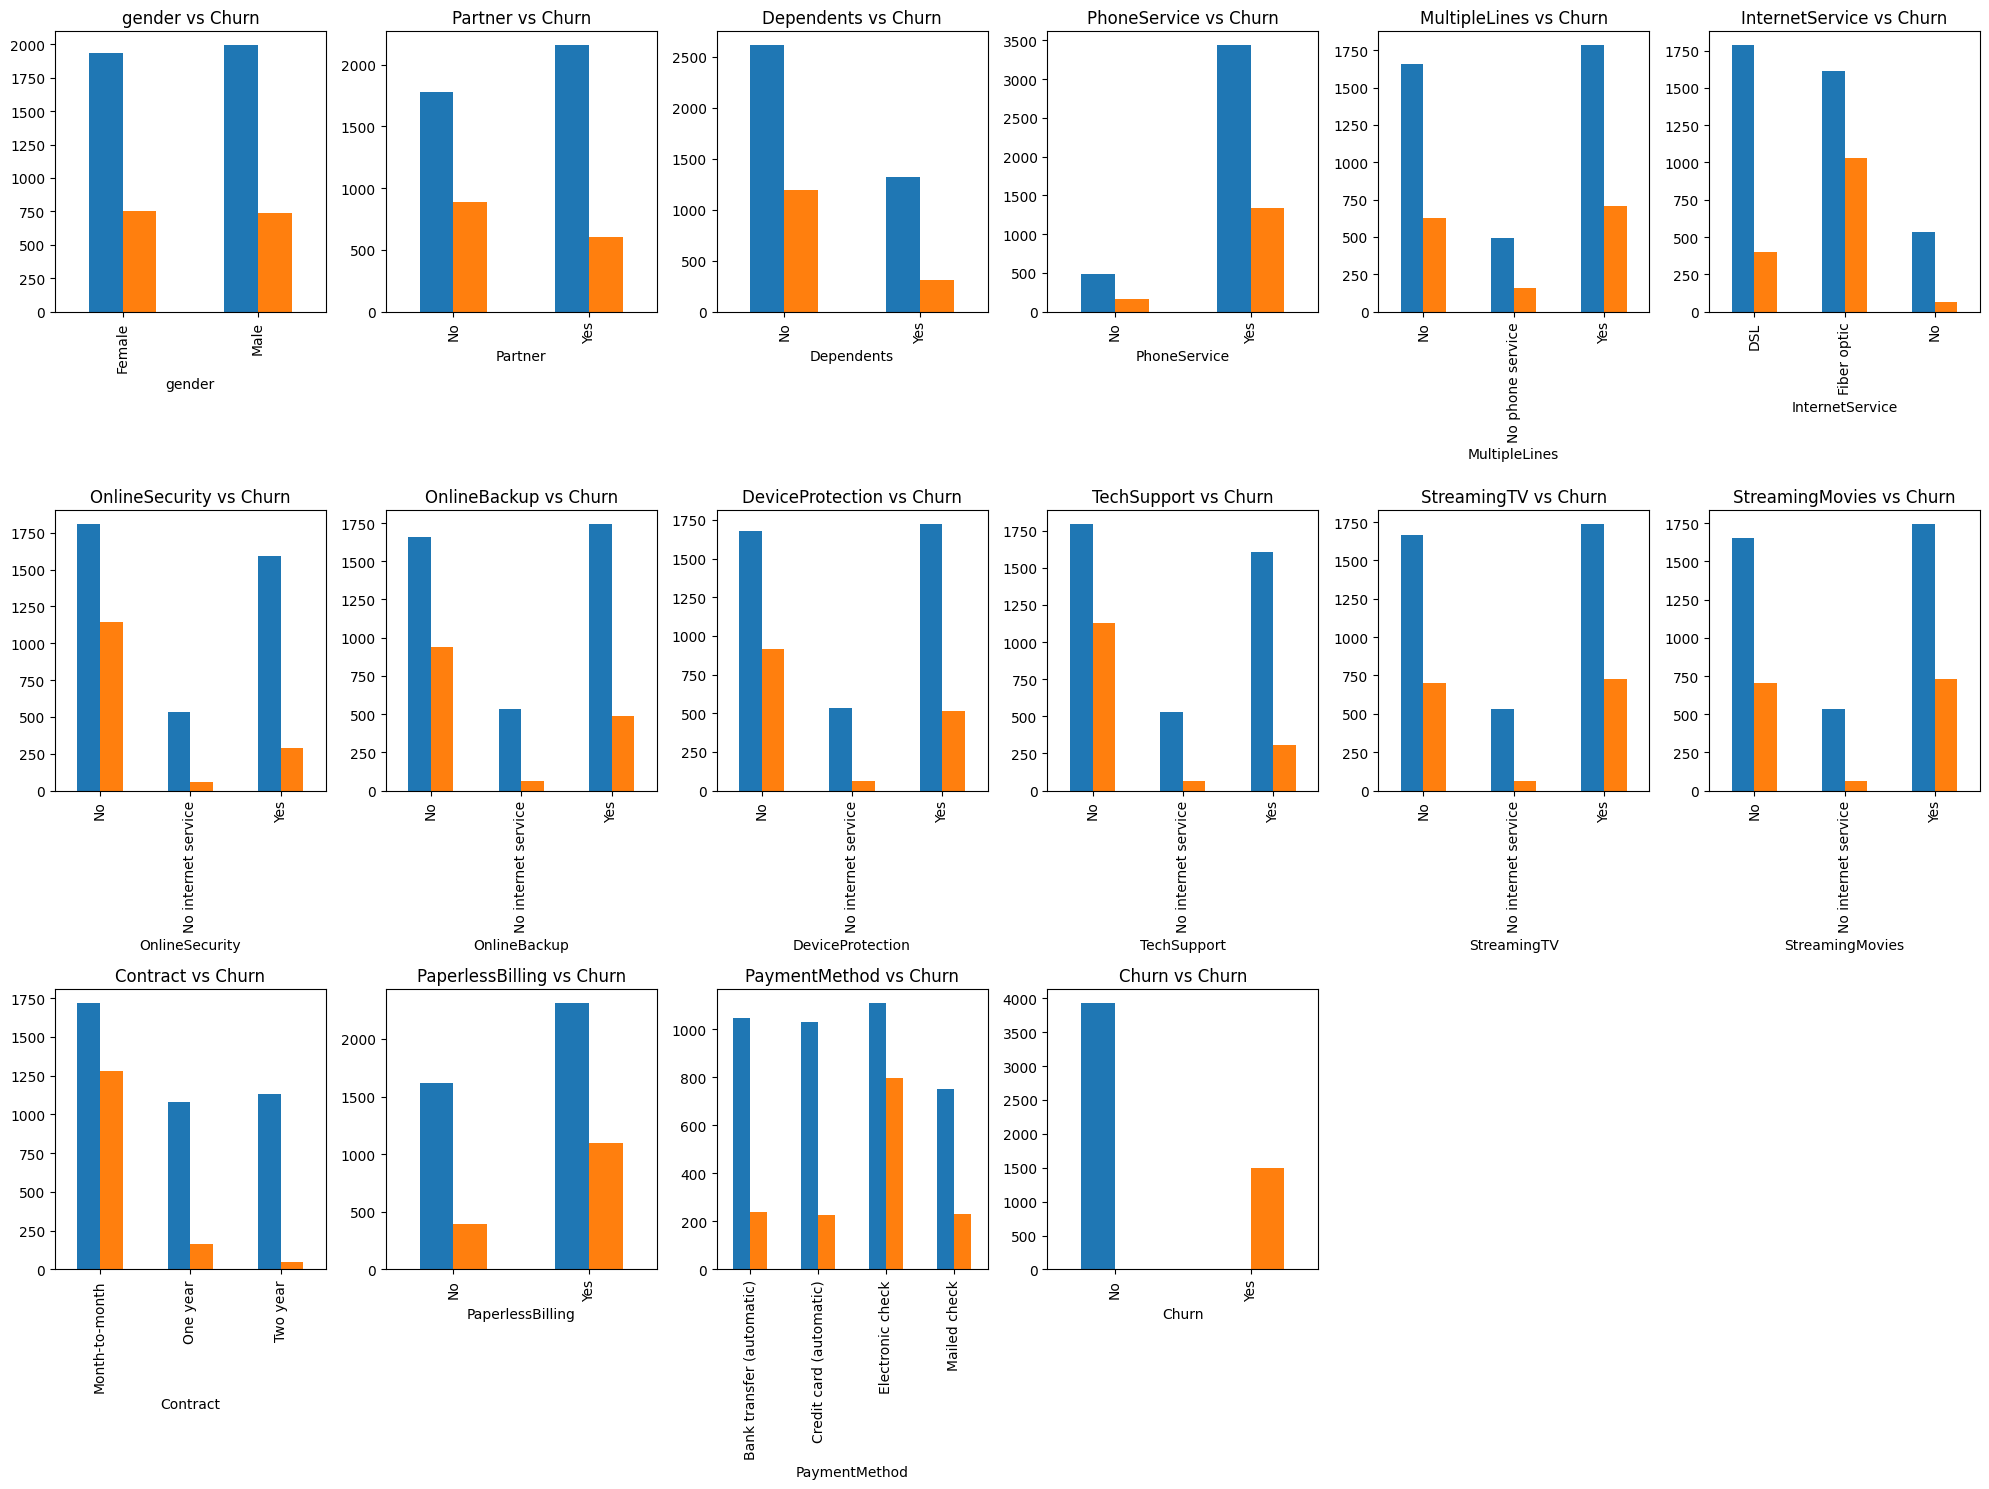

In [160]:
# checking the relationships of the features with the target

fig, ax = plt.subplots(3, 6, figsize=(20, 15))
ax = ax.flatten()

# Plot each categorical feature against the 'Churn' target
for i, col in enumerate(xAxisCategorical.columns):
    pd.crosstab(df_dropped_duplicates[col], df_dropped_duplicates['Churn']).plot(
        kind='bar', ax=ax[i], legend=False)
    ax[i].set_title(f"{col} vs Churn")

# Remove empty subplots if any
for j in range(i + 1, 18):
    fig.delaxes(ax[j])

plt.tight_layout()
plt.show()

In [161]:
# droping the categorical columns as they are not close related
# df_dropped_duplicates.drop(columns=["MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"], inplace=True)

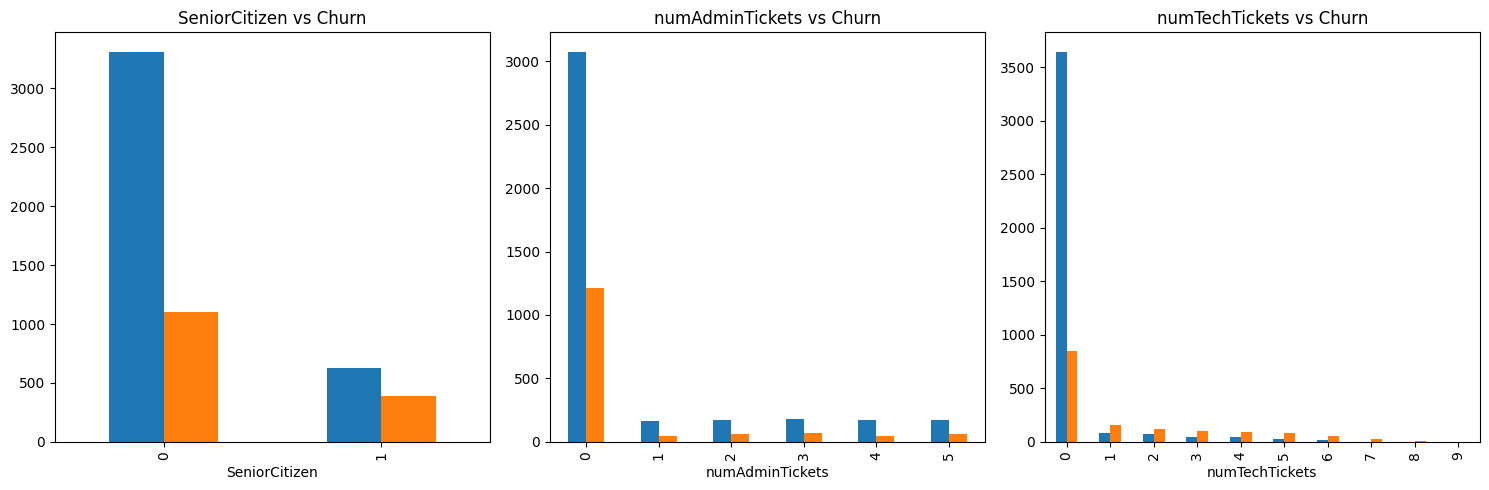

In [162]:
# checking the relationships of the numerical features with the target

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax = ax.flatten()

# Plot each categorical feature against the 'Churn' target
for i, col in enumerate(xAxisNumerical.columns):
    pd.crosstab(df_dropped_duplicates[col], df_dropped_duplicates['Churn']).plot(
        kind='bar', ax=ax[i], legend=False)
    ax[i].set_title(f"{col} vs Churn")

# Remove empty subplots if any
for j in range(i + 1, 3):
    fig.delaxes(ax[j])

plt.tight_layout()
plt.show()

## Outlier Treatment

In [163]:
# getting the skewness of the numerical features

for col in xAxisNumerical.columns:
  print(f"Skewness for {col} -> {df_dropped_duplicates[col].skew()}")

Skewness for SeniorCitizen -> 1.6106634503568227
Skewness for numAdminTickets -> 2.093624995918388
Skewness for numTechTickets -> 2.905774533947403


In [164]:
# dropping the highly skewed value > 2

df_dropped_duplicates.drop(columns=["numAdminTickets", "numTechTickets"], inplace=True)

# no such outliers found

# Train Test Split

In [165]:
# getting the x features sorted and the y features in the column

x_axis_features = df_dropped_duplicates.iloc[:,:-1]
y_axis_features = df_dropped_duplicates.iloc[:,-1]

In [166]:
# train-test split
from sklearn.model_selection import train_test_split

x_axis_features_train, x_axis_features_test, y_axis_features_train, y_axis_features_test = train_test_split(x_axis_features, y_axis_features, test_size = 0.3, random_state = 42)
x_axis_features_train.shape, x_axis_features_test.shape

((3799, 16), (1629, 16))

# Feature Engineering

In [167]:
x_axis_features_train.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [168]:
# on hot encoding all the categorical features
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# transformer = ColumnTransformer(transformers=[
#                                 ('tnf1',OneHotEncoder(sparse_output = False,drop='first'),
#                                 ['gender', 'Partner','Dependents', 'PhoneService', 'Contract', 'PaperlessBilling', 'PaymentMethod'])],remainder='passthrough')

transformer = ColumnTransformer(transformers=[
                                ('tnf1',OneHotEncoder(sparse_output = False,drop='first'),
                                ['gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'])],remainder='passthrough')

In [169]:
x_axis_features_train_new = transformer.fit_transform(x_axis_features_train)
x_axis_features_test_new = transformer.transform(x_axis_features_test)

x_axis_features_train_new, x_axis_features_test_new

(array([[0., 1., 1., ..., 0., 0., 0.],
        [1., 1., 1., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 1., 0.],
        ...,
        [1., 1., 0., ..., 0., 0., 1.],
        [0., 1., 1., ..., 0., 0., 0.],
        [1., 1., 0., ..., 0., 0., 0.]]),
 array([[0., 1., 1., ..., 0., 0., 0.],
        [0., 1., 0., ..., 1., 0., 0.],
        [1., 1., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 1., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [1., 1., 0., ..., 0., 0., 1.]]))

In [170]:
# label encoding the target variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

y_axis_features_train = le.fit_transform(y_axis_features_train)
y_axis_features_test = le.transform(y_axis_features_test)

# Model Building and Training

In [171]:
# scaling the values with the standard scaler

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(x_axis_features_train_new)

x_axis_features_train_new_scaled = scaler.transform(x_axis_features_train_new)
x_axis_features_test_new_scaled = scaler.transform(x_axis_features_test_new)

In [172]:
# model building using Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression(max_iter=2000, penalty = 'l2')
lr.fit(x_axis_features_train_new_scaled, y_axis_features_train)
y_pred_lr = lr.predict(x_axis_features_test_new_scaled)

In [173]:
# getting the accuracy score for the Logistic Regression

acc_lr = accuracy_score(y_axis_features_test, y_pred_lr)
print(f"Accuracy for Logistic Regression -> {acc_lr}")

Accuracy for Logistic Regression -> 0.7845303867403315


In [174]:
# model building using DecisionTree Classifier

from sklearn.tree import DecisionTreeClassifier

desc_tree = DecisionTreeClassifier(max_depth = 7)

desc_tree.fit(x_axis_features_train_new, y_axis_features_train)
y_pred_desc_tree = desc_tree.predict(x_axis_features_test_new)

In [175]:
# getting the accuracy score for the Decision Tree Clissifier
acc_desc_tree = accuracy_score(y_axis_features_test, y_pred_desc_tree)
print(f"Accuracy for Decision Tree Classifier -> {acc_desc_tree}")

Accuracy for Decision Tree Classifier -> 0.7366482504604052


#### Grid Search CV with the Random Forest Classifier

In [176]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [177]:
# tuning the hyperparameters

# Number of trees in random forest
n_estimators = [20,60,100,120]

# Number of features to consider at every split
max_features = [0.2,0.6,1.0]

# Maximum number of levels in tree
max_depth = [2,8,None]

# Number of samples
max_samples = [0.5,0.75,1.0]

param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
              'max_samples':max_samples
             }
print(param_grid)

{'n_estimators': [20, 60, 100, 120], 'max_features': [0.2, 0.6, 1.0], 'max_depth': [2, 8, None], 'max_samples': [0.5, 0.75, 1.0]}


In [178]:
# train with the new hyper parameters

from sklearn.model_selection import GridSearchCV

rf_grid = GridSearchCV(
                        estimator = rf,
                        param_grid = param_grid,
                        cv=5,
                        verbose = 2)

rf_grid.fit(x_axis_features_train_new, y_axis_features_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END max_depth=2, max_features=0.2, max_samples=0.5, n_estimators=20; total time=   0.3s
[CV] END max_depth=2, max_features=0.2, max_samples=0.5, n_estimators=20; total time=   0.2s
[CV] END max_depth=2, max_features=0.2, max_samples=0.5, n_estimators=20; total time=   0.2s
[CV] END max_depth=2, max_features=0.2, max_samples=0.5, n_estimators=20; total time=   0.2s
[CV] END max_depth=2, max_features=0.2, max_samples=0.5, n_estimators=20; total time=   0.1s
[CV] END max_depth=2, max_features=0.2, max_samples=0.5, n_estimators=60; total time=   0.3s
[CV] END max_depth=2, max_features=0.2, max_samples=0.5, n_estimators=60; total time=   0.5s
[CV] END max_depth=2, max_features=0.2, max_samples=0.5, n_estimators=60; total time=   0.4s
[CV] END max_depth=2, max_features=0.2, max_samples=0.5, n_estimators=60; total time=   0.4s
[CV] END max_depth=2, max_features=0.2, max_samples=0.5, n_estimators=60; total time=   0.4s
[CV] EN

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 8, None],
                         'max_features': [0.2, 0.6, 1.0],
                         'max_samples': [0.5, 0.75, 1.0],
                         'n_estimators': [20, 60, 100, 120]},
             verbose=2)

In [179]:
# getting the best params
rf_grid.best_params_

{'max_depth': 8, 'max_features': 0.6, 'max_samples': 0.75, 'n_estimators': 120}

In [180]:
# random forest model

rand_for = RandomForestClassifier(max_depth=8, max_features=0.2, max_samples=0.75, n_estimators=120)
rand_for.fit(x_axis_features_train_new, y_axis_features_train)
y_pred_rand_for = rand_for.predict(x_axis_features_test_new)

# checking the accuracy
acc_rand_for = accuracy_score(y_axis_features_test, y_pred_rand_for)
print(f"Accuracy for Random Forest Classifier -> {acc_rand_for}")

Accuracy for Random Forest Classifier -> 0.7728667894413751
